<a href="https://colab.research.google.com/github/vikixx13/medset/blob/main/medset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libs

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

check data size and vals

In [ ]:
df=pd.read_excel('/Untitled spreadsheet.xlsx')

In [ ]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 58 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   name                                                         0 non-null      float64
 1   DOA                                                          49 non-null     object 
 2   treatment                                                    18 non-null     object 
 3   Fever (P/A)                                                  49 non-null     object 
 4   Duration of fever (days)                                     49 non-null     float64
 5   Headache (P/A)                                               49 non-null     object 
 6   Duration of headache                                         8 non-null      float64
 7   Myalgia (P/A)                                                49 non-null     objec

In [ ]:
#checking size
df.shape

(57, 58)

In [ ]:
df.isna().sum()

name                                                           57
DOA                                                             8
treatment                                                      39
Fever (P/A)                                                     8
Duration of fever (days)                                        8
Headache (P/A)                                                  8
Duration of headache                                           49
Myalgia (P/A)                                                   8
Duration of myalgia                                            47
Cough (P/A)                                                     8
Dyspnea (P/A)                                                   8
Duration of dyspnea                                            43
Vomiting (P/A)                                                  8
Duration of vomiting                                           35
Clinical hematuria  (P/A)                                       8
Duration o

In [ ]:
#checking duplicated rows
df.duplicated().sum()

3

In [ ]:
#checking descriptive stats
df.describe()

,name,Duration of fever (days),Duration of headache,Duration of myalgia,Duration of vomiting,Duration of hematuria,Duration of edema,duration of abd pain(days)
count,0.0,49.000000,8.00000,10.000000,22.000000,0.0,2.00000,13.000000
mean,NaN,5.428571,3.25000,2.100000,2.227273,NaN,3.50000,2.769231
std,NaN,2.768875,2.12132,1.595131,1.823963,NaN,2.12132,1.640825
min,NaN,2.000000,1.00000,1.000000,1.000000,NaN,2.00000,1.000000
25%,NaN,3.000000,2.00000,1.000000,1.000000,NaN,2.75000,2.000000
50%,NaN,5.000000,2.00000,1.500000,1.500000,NaN,3.50000,2.000000
75%,NaN,7.000000,5.00000,2.000000,2.000000,NaN,4.25000,3.000000
max,NaN,14.000000,7.00000,5.000000,7.000000,NaN,5.00000,7.000000


<ipython-input-17-a93fb4c00443>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc=df.corr()


<Axes: >

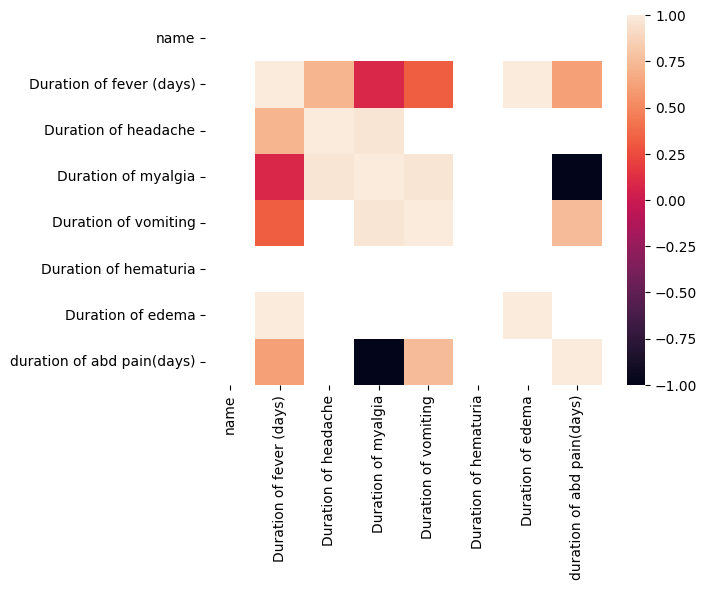

In [ ]:
tc=df.corr()
sn.heatmap(tc)

testing

In [ ]:
df_train, df_test =  df.randomSplit([0.825,0.175], seed = 2020)

In [ ]:
# Build the LogisticRegression object 'lr' by setting the required parameters
lr = LinearRegression(featuresCol="features", labelCol="salary_in_usd")

# fit the LogisticRegression object on the training data
lrmodel = lr.fit(df_train)

In [ ]:
#This LogisticRegressionModel can be used as a transformer to perform prediction on the testing data
predictonDF = lrmodel.transform(df_test)
evaluator = BinaryClassificationEvaluator()

# Calculate the accracy and print its value
accuracy = predictonDF.filter(predictonDF.label == predictonDF.prediction).count()/float(predictonDF.count())
print("Accuracy = ", accuracy)
